## Experiments

These single run experiments were run on the following experiments:

- Baseline. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_officialev_2025-04-21_18-31-20
- CP. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29
- CoT. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/run_1/ev_2025-05-12_00-25-08
- few-shot CoT. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-04_00-51-30/run_2/ev_2025-05-04_01-51-29
- CP-A. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-02_00-31-21/run_2/ev_2025-05-02_02-09-02
- LtM. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-06_22-14-46/run_2/ev_2025-05-07_09-53-08

**Eventually it was decided to do a multi-run evaluation for all experiments of 10 experimental runs per methodology. Reason for this was the observation of high variance of the single run experiments.**


In [1]:
import pandas as pd
import numpy as np


evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-21_18-31-20/evaluation_dataset.json"
df_eval_1 = pd.read_json(evaluation_dataset_path_1)
df_eval_1["experiment_name"] = "Baseline"
df_eval_1["evaluation_timestamp"] = "ev_2025-04-21_18-31-20"

evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29/evaluation_dataset.json"
df_eval_2 = pd.read_json(evaluation_dataset_path_2)
df_eval_2["experiment_name"] = "CP"
df_eval_2["evaluation_timestamp"] = "ev_2025-04-25_17-49-29"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/run_1/ev_2025-05-12_00-25-08/evaluation_dataset.json"
df_eval_3 = pd.read_json(evaluation_dataset_path_3)
df_eval_3["experiment_name"] = "CoT"
df_eval_3["evaluation_timestamp"] = "ev_2025-05-12_00-25-08"

evaluation_dataset_path_4 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-04_00-51-30/run_2/ev_2025-05-04_01-51-29/evaluation_dataset.json"
df_eval_4 = pd.read_json(evaluation_dataset_path_4)
df_eval_4["experiment_name"] = "few-shot CoT"
df_eval_4["evaluation_timestamp"] = "ev_2025-05-04_01-51-29"

evaluation_dataset_path_5 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-02_00-31-21/run_2/ev_2025-05-02_02-09-02/evaluation_dataset.json"
df_eval_5 = pd.read_json(evaluation_dataset_path_5)
df_eval_5["experiment_name"] = "CP-A"
df_eval_5["evaluation_timestamp"] = "ev_2025-05-02_02-09-02"

evaluation_dataset_path_6 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-06_22-14-46/run_4/ev_2025-05-07_09-53-08/evaluation_dataset.json"
df_eval_6 = pd.read_json(evaluation_dataset_path_6)
df_eval_6["experiment_name"] = "LtM"
df_eval_6["evaluation_timestamp"] = "ev_2025-05-07_09-53-08"


df = pd.concat([df_eval_1, df_eval_2, df_eval_3, df_eval_4, df_eval_5, df_eval_6])

In [2]:
df.head()

,resource,natural_language_question,ground_truth_query,target_endpoint,federates_with,endpoint_set,file_path,predicted_query,predicted_endpoint,predicted_endpoint_equal_to_target_endpoint,...,ground_truth_query_result_is_empty,planning_prompt_tokens,planning_completion_tokens,planning_total_tokens,pattern_prompt_tokens,pattern_completion_tokens,pattern_total_tokens,assembler_prompt_tokens,assembler_completion_tokens,assembler_total_tokens
0,https://sparql.swisslipids.org/.well-known/spa...,"For a given lipid (SWISSLIPID:000399814, Ceram...",PREFIX SWISSLIPID: <https://swisslipids.org/rd...,https://sparql.swisslipids.org/sparql/,"[https://sparql.uniprot.org/sparql, https://sp...",SwissLipids,SwissLipids/16.ttl,# https://sparql.uniprot.org/sparql\nSELECT DI...,https://sparql.uniprot.org/sparql,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://sparql.swisslipids.org/.well-known/spa...,"For a given lipid (SWISSLIPID:000399814, Ceram...",PREFIX SWISSLIPID: <https://swisslipids.org/rd...,https://sparql.swisslipids.org/sparql/,"[https://sparql.uniprot.org/sparql, https://sp...",SwissLipids,SwissLipids/6.ttl,# https://sparql.swissbioportal.org/sparql\nSE...,https://sparql.swissbioportal.org/sparql,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://sparql.swisslipids.org/.well-known/spa...,"For a given lipid (SWISSLIPID:000399814, Ceram...",PREFIX SWISSLIPID: <https://swisslipids.org/rd...,https://sparql.swisslipids.org/sparql/,[https://sparql.rhea-db.org/sparql],SwissLipids,SwissLipids/5.ttl,# https://sparql.swissbioportal.org/sparql\nSE...,https://sparql.swissbioportal.org/sparql,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://sparql.swisslipids.org/.well-known/spa...,Lipids affected by human enzymes,PREFIX owl: <http://www.w3.org/2002/07/owl#>\n...,https://sparql.swisslipids.org/sparql/,"[https://sparql.uniprot.org/sparql, https://sp...",SwissLipids,SwissLipids/34.ttl,# https://sparql.swissbioportal.org/sparql\nSE...,https://sparql.swissbioportal.org/sparql,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://sparql.uniprot.org/.well-known/sparql-...,What are the Homo sapiens genes associated wit...,PREFIX up:<http://purl.uniprot.org/core/>\nPRE...,https://sparql.uniprot.org/sparql,"[https://sparql.omabrowser.org/sparql/, https:...",Uniprot,UniProt/118_biosodafrontend_rat_brain_human_ca...,# https://sparql.uniprot.org/sparql\nSELECT DI...,https://sparql.uniprot.org/sparql,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Percentage of syntactically valid SPARQL queries by methodology.

In [3]:
# code to calculate the percentage of valid SPARQL queries

valid_summary = (
    df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .assign(syntactically_valid=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("syntactically_valid")
)

print(valid_summary)

  experiment_name  total  n_valid  syntactically_valid
0        Baseline     32        0             0.000000
1              CP     32       16            50.000000
5    few-shot CoT     29       19            65.517241
3             CoT     32       25            78.125000
2            CP-A     32       26            81.250000
4             LtM     32       31            96.875000


## 

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_23036/551483948.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")


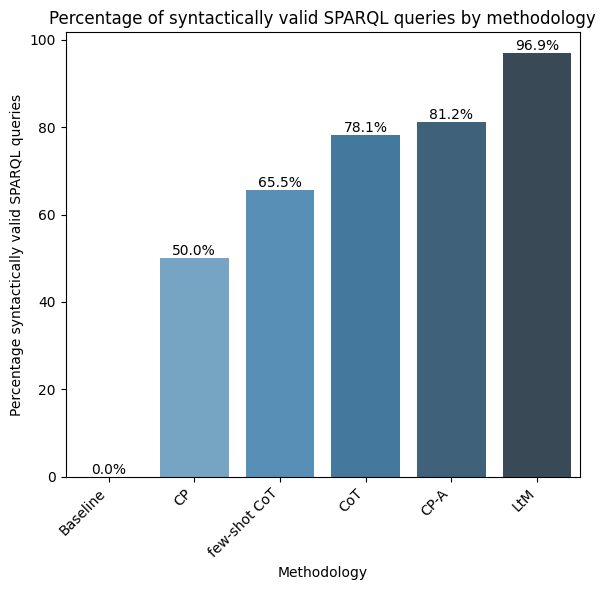

In [4]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
ax = sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")
plt.ylabel("Percentage syntactically valid SPARQL queries")
plt.title("Percentage of syntactically valid SPARQL queries by methodology")
plt.xlabel("Methodology")
plt.xticks(rotation=45, ha='right', fontsize=10)

for p in ax.patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )
plt.tight_layout()
plt.show()

## Percentage of empty result by Experiment\n(Syntactically Correct Queries Only)

In [5]:
df_error = df[df["is_valid_sparql"] == True]

total_passed_queries_to_endpoint = (
    df_error
    .groupby("experiment_name")
    .size() 
    .reset_index(name="total_passed_queries_to_endpoint")
)

empty_result_counts = (
    df_error[df_error["error_occured_at_endpoint_message"] == "no error, but empty result"]
    .groupby("experiment_name")
    .size()
    .reset_index(name="empty_result_count")
)

summary = pd.merge(total_passed_queries_to_endpoint, empty_result_counts, on="experiment_name", how="left")
summary["empty_result_count"] = summary["empty_result_count"].fillna(0)
summary["percentage_empty_result"] = summary["empty_result_count"] / summary["total_passed_queries_to_endpoint"] * 100

summary.head(6)

,experiment_name,total_passed_queries_to_endpoint,empty_result_count,percentage_empty_result
0,CP,16,11,68.750000
1,CP-A,26,7,26.923077
2,CoT,25,20,80.000000
3,LtM,31,6,19.354839
4,few-shot CoT,19,10,52.631579


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_23036/3660616224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


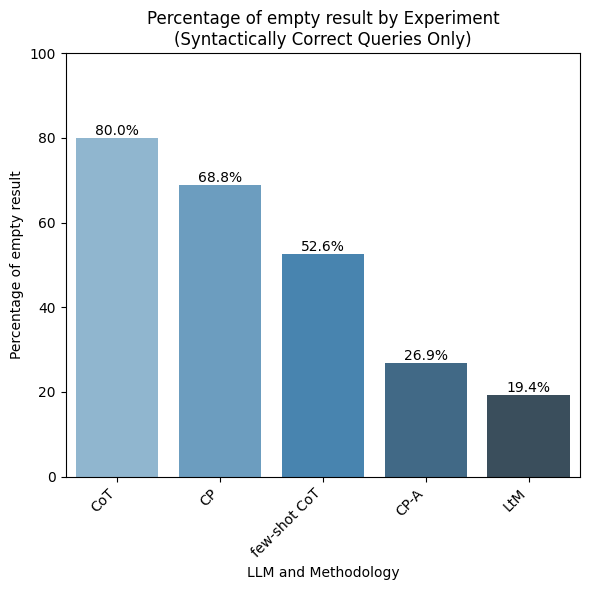

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by percentage for a clearer plot
summary_sorted = summary.sort_values("percentage_empty_result", ascending=False)

plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x="experiment_name",
    y="percentage_empty_result",
    data=summary_sorted,
    palette="Blues_d"
)
plt.ylabel('Percentage of empty result')
plt.xlabel('LLM and Methodology')
plt.title('Percentage of empty result by Experiment\n(Syntactically Correct Queries Only)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## Count of timed-out queries by Methodology (syntactically correct queries only)

In [7]:
df_error = df[df["is_valid_sparql"] == True]

total_passed_queries_to_endpoint = (
    df_error
    .groupby("experiment_name")
    .size() 
    .reset_index(name="total_passed_queries_to_endpoint")
)

timeout_counts = (
    df_error[(df_error["error_occured_at_endpoint_message"].str.contains("The read operation timed out")) | 
             (df_error["error_occured_at_endpoint_message"].str.contains("Query timed out after"))]
    .groupby("experiment_name")
    .size()
    .reset_index(name="timeout_count")
)

timeout_percentages = (
    timeout_counts.merge(total_passed_queries_to_endpoint, on="experiment_name")
    .assign(timeout_percentage=lambda x: 100 * x.timeout_count / x.total_passed_queries_to_endpoint)
    .sort_values("timeout_percentage")
)

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_23036/3827707258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


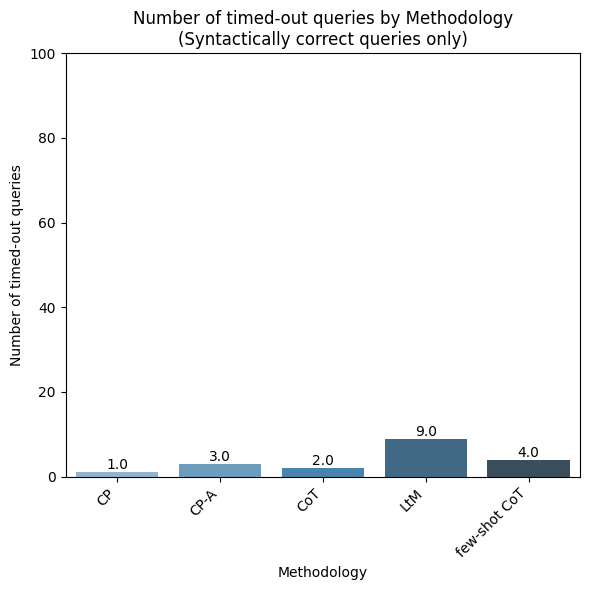

In [8]:

plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x="experiment_name",
    y="timeout_count",
    data=timeout_counts,
    palette="Blues_d"
)
plt.ylabel('Number of timed-out queries')
plt.xlabel('Methodology')
plt.title('Number of timed-out queries by Methodology\n(Syntactically correct queries only)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## Endpoint result distribution for syntactic valid SPARQL queries.

In [9]:
import pandas as pd
import numpy as np

# 1. Filter for valid SPARQL queries
valid_df = df[df["is_valid_sparql"] == True].copy()

# 2. Classify error messages
valid_df["error_type"] = "Error"  # Default classification

# Apply classifications
empty_result_mask = valid_df["error_occured_at_endpoint_message"] == "no error, but empty result"
timeout_mask = valid_df["error_occured_at_endpoint_message"].str.contains("The read operation timed out", na=False) | valid_df["error_occured_at_endpoint_message"].str.contains("Query timed out after", na=False)
no_error_mask = valid_df["error_occured_at_endpoint_message"] == "no error"

valid_df.loc[empty_result_mask, "error_type"] = "Empty Result"
valid_df.loc[timeout_mask, "error_type"] = "Timeout"
valid_df.loc[no_error_mask, "error_type"] = "No Error"

# 3. Group by experiment and error type to get counts
long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")

# 4. Get total valid queries per experiment
total_per_exp = valid_df.groupby("experiment_name").size().reset_index(name="total")

# 5. Merge to calculate percentages
long_df = pd.merge(long_df, total_per_exp, on="experiment_name")
long_df["percentage"] = (long_df["count"] / long_df["total"]) * 100

# 6. Get unique experiments and error types for plotting
experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

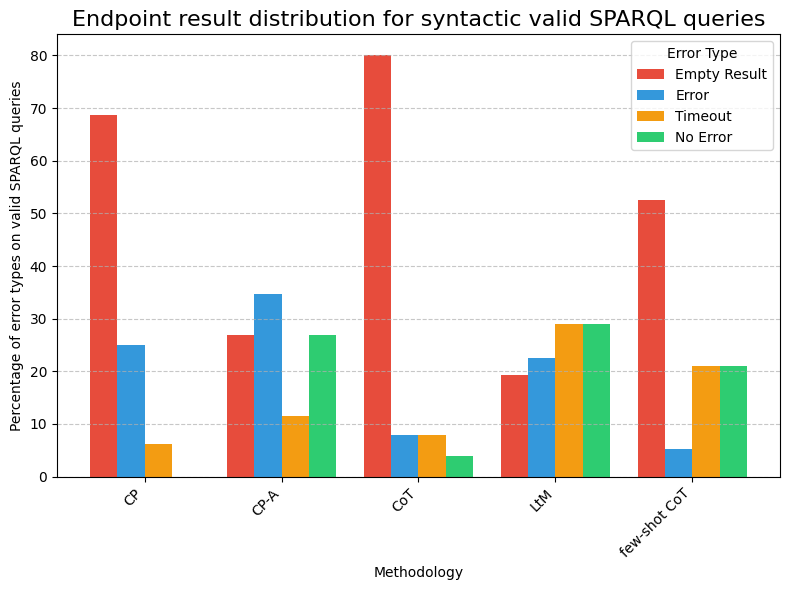

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")
total_per_exp = valid_df.groupby("experiment_name").size().reset_index(name="total")
long_df = pd.merge(long_df, total_per_exp, on="experiment_name")
long_df["percentage"] = (long_df["count"] / long_df["total"]) * 100

experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2
index = np.arange(len(experiments))
colors = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']

for i, error_type in enumerate(error_types):
    error_data = long_df[long_df["error_type"] == error_type]
    error_dict = dict(zip(error_data["experiment_name"], error_data["percentage"]))
    percentages = [error_dict.get(exp, 0) for exp in experiments]
    ax.bar(index + i*bar_width, percentages, bar_width, label=error_type, color=colors[i % len(colors)])

ax.set_xlabel('Methodology')
ax.set_ylabel('Percentage of error types on valid SPARQL queries')
ax.set_title('Endpoint result distribution for syntactic valid SPARQL queries', fontsize=16)
ax.set_xticks(index + bar_width * (len(error_types) - 1) / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right')
ax.legend(title="Error Type")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

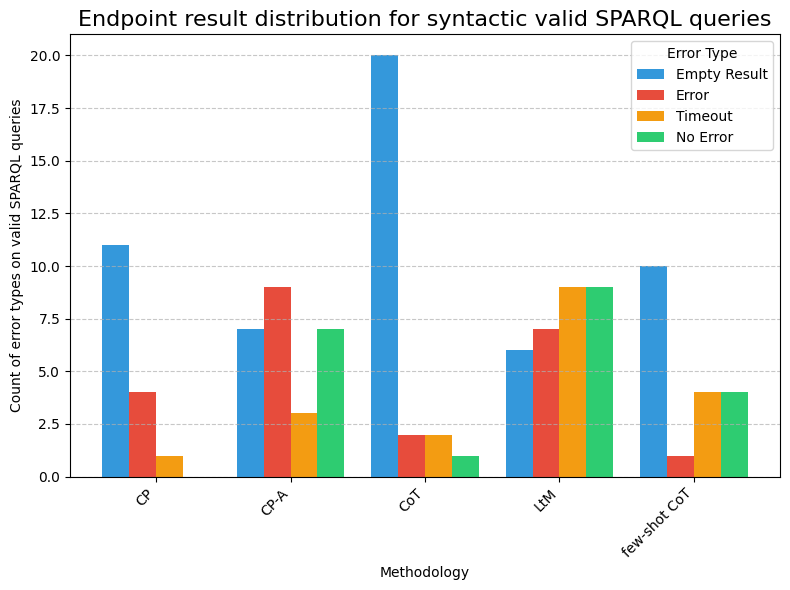

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the same valid_df with error_type classifications from before

# Group by experiment and error type to get counts (skip percentage calculation)
long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")

# Get unique experiments and error types
experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Set width of bars
bar_width = 0.2
index = np.arange(len(experiments))

# Colors for different error types
colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

# Plot bars for each error type
for i, error_type in enumerate(error_types):
    error_data = long_df[long_df["error_type"] == error_type]
    
    # Create a dictionary mapping experiment to count
    error_dict = dict(zip(error_data["experiment_name"], error_data["count"]))
    
    # Get counts in the same order as experiments
    counts = [error_dict.get(exp, 0) for exp in experiments]
    
    # Plot the bars
    ax.bar(index + i*bar_width, counts, bar_width, 
           label=error_type, color=colors[i % len(colors)])

# Add labels, title and legend
ax.set_xlabel('Methodology')
ax.set_ylabel('Count of error types on valid SPARQL queries')
ax.set_title('Endpoint result distribution for syntactic valid SPARQL queries', fontsize=16)
ax.set_xticks(index + bar_width * (len(error_types) - 1) / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right')
ax.legend(title="Error Type")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Approximated performance metrics by methodology, excluding empty results and query errors.

In [12]:
import pandas as pd
import numpy as np
import json

def read_metrics_as_df(path):
    with open(path, "r") as f:
        data = json.load(f)
    if isinstance(data, dict):
        data = [data]
    return pd.DataFrame(data)

evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-21_18-31-20/metrics_dataset.json"
df_metrics_1 = read_metrics_as_df(evaluation_dataset_path_1)
df_metrics_1["experiment_name"] = "Baseline"
df_metrics_1["evaluation_timestamp"] = "ev_2025-04-21_18-31-20"

evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29/metrics_dataset.json"
df_metrics_2 = read_metrics_as_df(evaluation_dataset_path_2)
df_metrics_2["experiment_name"] = "CP"
df_metrics_2["evaluation_timestamp"] = "ev_2025-04-25_17-49-29"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/run_1/ev_2025-05-12_00-25-08/metrics_dataset.json"
df_metrics_3 = read_metrics_as_df(evaluation_dataset_path_3)
df_metrics_3["experiment_name"] = "CoT"
df_metrics_3["evaluation_timestamp"] = "ev_2025-05-12_00-25-08"

evaluation_dataset_path_4 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-04_00-51-30/run_2/ev_2025-05-04_01-51-29/metrics_dataset.json"
df_metrics_4 = read_metrics_as_df(evaluation_dataset_path_4)
df_metrics_4["experiment_name"] = "CoT few shot"
df_metrics_4["evaluation_timestamp"] = "ev_2025-05-04_01-51-29"

evaluation_dataset_path_5 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-02_00-31-21/run_2/ev_2025-05-02_02-09-02/metrics_dataset.json"
df_metrics_5 = read_metrics_as_df(evaluation_dataset_path_5)
df_metrics_5["experiment_name"] = "CP-A"
df_metrics_5["evaluation_timestamp"] = "ev_2025-05-02_02-09-02"

evaluation_dataset_path_6 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-06_22-14-46/run_4/ev_2025-05-07_09-53-08/metrics_dataset.json"
df_metrics_6 = read_metrics_as_df(evaluation_dataset_path_6)
df_metrics_6["experiment_name"] = "LtM"
df_metrics_6["evaluation_timestamp"] = "ev_2025-05-07_09-53-08"

df_metrics = pd.concat([df_metrics_1, df_metrics_2, df_metrics_3, df_metrics_4, df_metrics_5, df_metrics_6])

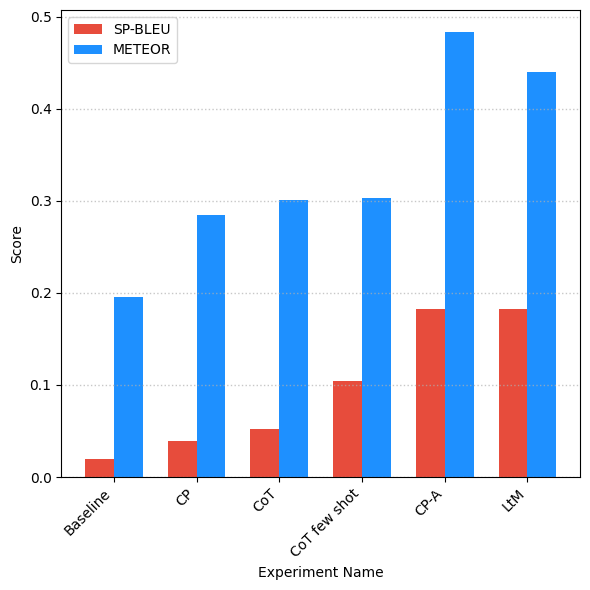

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

order = ["Baseline", "CP", "CoT", "CoT few shot", "CP-A", "LtM"]
valid_order = [method for method in order if method in df_metrics['experiment_name'].values]

df_metrics['experiment_name'] = pd.Categorical(df_metrics['experiment_name'], categories=valid_order, ordered=True)
df_metrics = df_metrics.sort_values('experiment_name')

metrics = ['SP-BLEU', 'METEOR']
metric_labels = ['SP-BLEU', 'METEOR']
colors = ['#e74c3c', 'dodgerblue']

fig, ax = plt.subplots(figsize=(6, 6))

bar_width = 0.35
index = np.arange(len(valid_order))

for i, (metric, label, color) in enumerate(zip(metrics, metric_labels, colors)):
    values = [df_metrics[df_metrics['experiment_name'] == exp][metric].values[0] for exp in valid_order]
    ax.bar(index + i*bar_width - bar_width/2, values, bar_width, label=label, color=color)

ax.set_xlabel('Experiment Name')
ax.set_ylabel('Score')
ax.set_xticks(index)
ax.set_xticklabels(valid_order, rotation=45, ha='right', fontsize=10)
ax.legend()
ax.grid(axis='y', linestyle=':', linewidth=1, alpha=0.7)

plt.tight_layout()
plt.show()

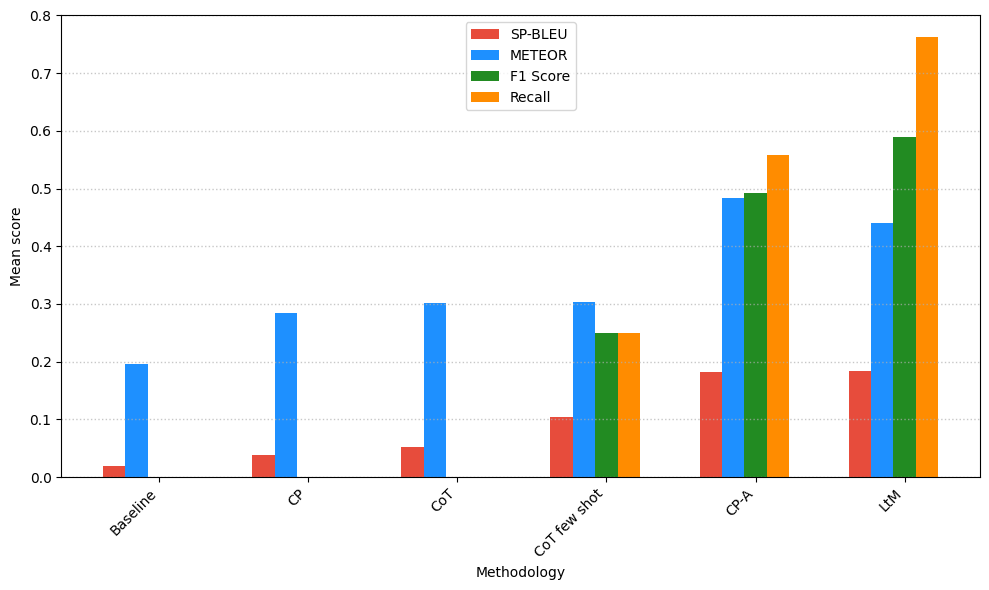

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

order = ["Baseline", "CP", "CoT", "CoT few shot", "CP-A", "LtM"]
valid_order = [method for method in order if method in df_metrics['experiment_name'].values]

# Convert to categorical type to ensure proper ordering
df_metrics['experiment_name'] = pd.Categorical(df_metrics['experiment_name'], categories=valid_order, ordered=True)
df_metrics = df_metrics.sort_values('experiment_name')

# Define metrics to plot
metrics = [
    'SP-BLEU', 
    'METEOR', 
    'avg_result_excluding_empty_result_f1',
    'avg_result_excluding_empty_result_recall', 
    'avg_result_excluding_empty_result_precision'
]

# Define nicer labels for the legend
metric_labels = [
    'SP-BLEU', 
    'METEOR', 
    'F1 Score', 
    'Recall', 
    'Precision'
]

# Setup figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
bar_width = 0.15
index = np.arange(len(valid_order))
colors = ['#e74c3c', 'dodgerblue', 'forestgreen', 'darkorange']

# Create bars for each metric
for i, (metric, label, color) in enumerate(zip(metrics, metric_labels, colors)):
    values = [df_metrics[df_metrics['experiment_name'] == exp][metric].values[0] for exp in valid_order]
    ax.bar(index + i*bar_width - bar_width*2, values, bar_width, label=label, color=color)
    
    # for j, value in enumerate(values):
    #     ax.text(index[j] + i*bar_width - bar_width*2, value, f'{value:.2f}', 
    #             ha='center', va='bottom', fontsize=8)


ax.set_xlabel('Methodology')
ax.set_ylabel('Mean score')
ax.set_xticks(index)
ax.set_xticklabels(valid_order, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle=':', linewidth=1, alpha=0.7)

plt.tight_layout()
plt.show()